In [0]:
from google.colab import files 
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"francuzovd","key":"4c441945c779566ce809d53105dde63d"}'}

In [0]:
!pip install -q kaggle

In [0]:
!mkdir -p ./.kaggle

In [0]:
os.listdir('../content/')

['.config', '.kaggle', 'kaggle.json', '!cp', 'sample_data']

In [0]:
!cp kaggle.json ./.kaggle/

In [0]:
os.listdir('../content/.kaggle')

['kaggle.json']

In [0]:
!kaggle competitions list

ref                                                deadline             category            reward  teamCount  userHasEntered  
-------------------------------------------------  -------------------  ---------------  ---------  ---------  --------------  
digit-recognizer                                   2030-01-01 00:00:00  Getting Started  Knowledge       2700           False  
titanic                                            2030-01-01 00:00:00  Getting Started  Knowledge      11000            True  
house-prices-advanced-regression-techniques        2030-01-01 00:00:00  Getting Started  Knowledge       4450           False  
imagenet-object-localization-challenge             2029-12-31 07:00:00  Research         Knowledge         36           False  
competitive-data-science-predict-future-sales      2019-12-31 23:59:00  Playground           Kudos       2707           False  
two-sigma-financial-news                           2019-07-15 23:59:00  Featured          $100,000      

In [0]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

from sklearn.metrics import accuracy_score as acc

from sklearn.ensemble import RandomForestClassifier

In [50]:
os.listdir('../content')

['.config',
 'test.csv',
 '.kaggle',
 'kaggle.json',
 'decision_titanic.csv',
 '!cp',
 'gender_submission.csv',
 'train.csv',
 'sample_data']

In [0]:
!kaggle competitions download -c titanic

  0% 0.00/59.8k [00:00<?, ?B/s]
100% 59.8k/59.8k [00:00<00:00, 51.9MB/s]
  0% 0.00/28.0k [00:00<?, ?B/s]
100% 28.0k/28.0k [00:00<00:00, 17.2MB/s]
  0% 0.00/3.18k [00:00<?, ?B/s]
100% 3.18k/3.18k [00:00<00:00, 2.58MB/s]


In [121]:
train = pd.read_csv('../content/train.csv')
valid = pd.read_csv('../content/test.csv')
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [122]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [123]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [124]:
valid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [125]:
train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [0]:
train = pd.concat([train, pd.get_dummies(train['Embarked'], prefix='Embarked')], axis=1)
valid = pd.concat([valid, pd.get_dummies(valid['Embarked'], prefix='Embarked')], axis=1)

In [127]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
Embarked_C     891 non-null uint8
Embarked_Q     891 non-null uint8
Embarked_S     891 non-null uint8
dtypes: float64(2), int64(5), object(5), uint8(3)
memory usage: 86.2+ KB


In [128]:
train.loc[(train['Cabin'].notnull()) & (train['Pclass'] == 1)].head(15)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Embarked_C,Embarked_Q,Embarked_S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1,0,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0,0,1
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,0,0,1
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S,0,0,1
23,24,1,1,"Sloper, Mr. William Thompson",male,28.0,0,0,113788,35.5000,A6,S,0,0,1
27,28,0,1,"Fortune, Mr. Charles Alexander",male,19.0,3,2,19950,263.0000,C23 C25 C27,S,0,0,1
31,32,1,1,"Spencer, Mrs. William Augustus (Marie Eugenie)",female,NaN,1,0,PC 17569,146.5208,B78,C,1,0,0
52,53,1,1,"Harper, Mrs. Henry Sleeper (Myna Haxtun)",female,49.0,1,0,PC 17572,76.7292,D33,C,1,0,0
54,55,0,1,"Ostby, Mr. Engelhart Cornelius",male,65.0,0,1,113509,61.9792,B30,C,1,0,0
55,56,1,1,"Woolner, Mr. Hugh",male,NaN,0,0,19947,35.5000,C52,S,0,0,1


In [63]:
goal = train['Survived']
train = train.drop(['Survived'], axis=1)
train.columns

Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked', 'Embarked_C', 'Embarked_Q',
       'Embarked_S'],
      dtype='object')

In [0]:
X_train, X_test, y_train, y_test = train_test_split(train, goal, test_size=0.2, random_state=42)

In [0]:
dates = [X_train, X_test, valid]

In [0]:
appeal = X_train['Name'].str.split(', ', expand=True)
appeal = appeal[1].str.split(' ', n=1, expand=True)

In [101]:
appeal[0].unique()

array(['Mr.', 'Miss.', 'Major.', 'Mrs.', 'Master.', 'Rev.', 'Dr.', 'Col.',
       'Mlle.', 'Capt.', 'Mme.', 'Ms.', 'the', 'Lady.'], dtype=object)

In [102]:
X_train['Appeal'] = appeal[0]
X_train.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Embarked_C,Embarked_Q,Embarked_S,Appeal
331,332,1,"Partner, Mr. Austen",male,45.5,0,0,113043,28.5000,C124,S,0,0,1,Mr.
733,734,2,"Berriman, Mr. William John",male,23.0,0,0,28425,13.0000,NaN,S,0,0,1,Mr.
382,383,3,"Tikkanen, Mr. Juho",male,32.0,0,0,STON/O 2. 3101293,7.9250,NaN,S,0,0,1,Mr.
704,705,3,"Hansen, Mr. Henrik Juul",male,26.0,1,0,350025,7.8542,NaN,S,0,0,1,Mr.
813,814,3,"Andersson, Miss. Ebba Iris Alfrida",female,6.0,4,2,347082,31.2750,NaN,S,0,0,1,Miss.


In [103]:
age_appeal = X_train[['Age', 'Appeal']].loc[X_train['Age'].notnull()].groupby(['Appeal']).median().reset_index()
age_appeal

,Appeal,Age
0,Capt.,70.0
1,Col.,58.0
2,Dr.,47.0
3,Lady.,48.0
4,Major.,48.5
5,Master.,3.0
6,Miss.,21.5
7,Mlle.,24.0
8,Mme.,24.0
9,Mr.,30.0


In [104]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 712 entries, 331 to 102
Data columns (total 15 columns):
PassengerId    712 non-null int64
Pclass         712 non-null int64
Name           712 non-null object
Sex            712 non-null object
Age            572 non-null float64
SibSp          712 non-null int64
Parch          712 non-null int64
Ticket         712 non-null object
Fare           712 non-null float64
Cabin          159 non-null object
Embarked       710 non-null object
Embarked_C     712 non-null uint8
Embarked_Q     712 non-null uint8
Embarked_S     712 non-null uint8
Appeal         712 non-null object
dtypes: float64(2), int64(4), object(6), uint8(3)
memory usage: 74.4+ KB


In [105]:
for data in dates:
  data['Sex'].loc[data['Sex'] == 'male'] = 0
  data['Sex'].loc[data['Sex'] == 'female'] = 1
  
  for ap in age_appeal['Appeal'].values:
    age = age_appeal['Age'].loc[age_appeal['Appeal'] == ap].values[0]
    data['Age'].loc[data['Age'].isnull()] = age

/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:194: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-pa

TypeError: ignored

In [106]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 712 entries, 331 to 102
Data columns (total 15 columns):
PassengerId    712 non-null int64
Pclass         712 non-null int64
Name           712 non-null object
Sex            712 non-null int64
Age            712 non-null float64
SibSp          712 non-null int64
Parch          712 non-null int64
Ticket         712 non-null object
Fare           712 non-null float64
Cabin          159 non-null object
Embarked       710 non-null object
Embarked_C     712 non-null uint8
Embarked_Q     712 non-null uint8
Embarked_S     712 non-null uint8
Appeal         712 non-null object
dtypes: float64(2), int64(5), object(5), uint8(3)
memory usage: 74.4+ KB


In [107]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 179 entries, 709 to 10
Data columns (total 14 columns):
PassengerId    179 non-null int64
Pclass         179 non-null int64
Name           179 non-null object
Sex            179 non-null int64
Age            179 non-null float64
SibSp          179 non-null int64
Parch          179 non-null int64
Ticket         179 non-null object
Fare           179 non-null float64
Cabin          45 non-null object
Embarked       179 non-null object
Embarked_C     179 non-null uint8
Embarked_Q     179 non-null uint8
Embarked_S     179 non-null uint8
dtypes: float64(2), int64(5), object(4), uint8(3)
memory usage: 17.3+ KB


In [108]:
valid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 14 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null int64
Age            418 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           418 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
Embarked_C     418 non-null uint8
Embarked_Q     418 non-null uint8
Embarked_S     418 non-null uint8
dtypes: float64(2), int64(5), object(4), uint8(3)
memory usage: 37.2+ KB


In [109]:
valid['Fare'].loc[valid['Fare'].isnull()] = X_train['Fare'].mean()

/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:194: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [0]:
col = ['Pclass', 'Sex', 'Age', 'Fare', 'SibSp', 'Embarked_C', 'Embarked_Q', 'Embarked_S']

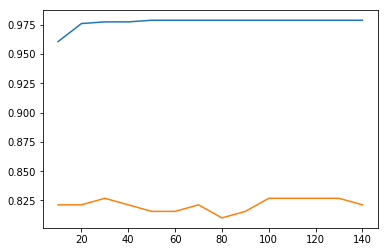

In [112]:
dt_train = []
dt_test = []
X = range(10, 150, 10)
for i in X:
  clf = RandomForestClassifier(n_estimators=i, random_state=42)
  clf.fit(X_train[col], y_train)
  
  dt_train.append(acc(y_train, clf.predict(X_train[col])))
  dt_test.append(acc(y_test, clf.predict(X_test[col])))


plt.plot(X, dt_train)
plt.plot(X, dt_test)

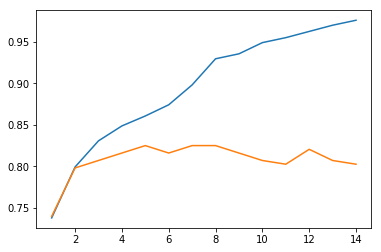

In [83]:
dt_train = []
dt_test = []
X = range(1, 15)
for i in X:
  clf = RandomForestClassifier(n_estimators=60, max_depth=i, random_state=42)
  clf.fit(X_train[col], y_train)
  
  dt_train.append(acc(y_train, clf.predict(X_train[col])))
  dt_test.append(acc(y_test, clf.predict(X_test[col])))


plt.plot(X, dt_train)
plt.plot(X, dt_test)

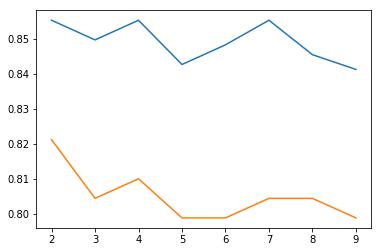

In [93]:
dt_train = []
dt_test = []
X = range(2, 10)
for i in X:
  clf = RandomForestClassifier(n_estimators=60, max_depth=5, min_samples_leaf=i, random_state=42)
  clf.fit(X_train[col], y_train)
  
  dt_train.append(acc(y_train, clf.predict(X_train[col])))
  dt_test.append(acc(y_test, clf.predict(X_test[col])))


plt.plot(X, dt_train)
plt.plot(X, dt_test)

In [0]:
clf = RandomForestClassifier(n_estimators=30, max_depth=10, min_samples_leaf=2, random_state=42)

In [114]:
clf.fit(X_train[col], y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=10, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=2, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=30, n_jobs=None,
            oob_score=False, random_state=42, verbose=0, warm_start=False)

In [115]:
y_pred = clf.predict(X_train[col])
acc(y_train, y_pred)

0.8974719101123596

In [116]:
y_pred = clf.predict(X_test[col])
acc(y_test, y_pred)

0.8379888268156425

In [44]:
decision = clf.predict(valid[col])
decision

array([0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [45]:
out_file = pd.read_csv('../content/gender_submission.csv')
out_file.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [46]:
df = pd.DataFrame(data={'PassengerId': valid['PassengerId'], 'Survived': decision})
df.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0


In [0]:
df.to_csv('../content/decision_titanic.csv', index=False)

In [51]:
os.listdir('../content/')

['.config',
 'test.csv',
 '.kaggle',
 'kaggle.json',
 'decision_titanic.csv',
 '!cp',
 'gender_submission.csv',
 'train.csv',
 'sample_data']

In [117]:
!kaggle competitions submit -c titanic -f '../content/decision_titanic.csv' -m "Second try"

100% 2.77k/2.77k [00:02<00:00, 1.06kB/s]
Successfully submitted to Titanic: Machine Learning from Disaster^C
